In [1428]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle as pkl
import sys, os
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pymatgen import Composition, Element
from matplotlib.transforms import Affine2D
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [299]:
with open('data/trained_model_results_pca.pkl', 'rb') as f:
    pca_results = pkl.load(f)

In [300]:
best_params, y_pred_train, y_pred_test, X_train_k, X_test_k, y_train_k, y_test_k, n_pts_train_k, n_pts_test_k, histories, X_train_df, X_test_df = pca_results

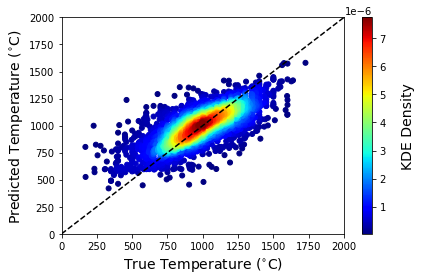

In [791]:
# calcine temp plot

fold = 1
operation = 0
y_pred = np.mean(y_pred_test[fold], axis=1)
y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])

fig, ax = plt.subplots()
x = np.array(y_true[:, operation])
y = np.array(y_pred[:, operation])
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax_ = ax.scatter(x, y, c=z, cmap=cm.jet, s=25)
cbar = plt.colorbar(ax_)
cbar.set_label("KDE Density", labelpad=15, fontsize=14)

plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.plot([0, 2000], [0, 2000], color='black', linestyle='dashed')
ax.set_xlabel("True Temperature ($^{\circ}$C)", fontsize=14)
ax.set_ylabel("Predicted Temperature ($^{\circ}$C)", fontsize=14)
fig.tight_layout()
fig.savefig('figures/cvae_calcine_temp_parity.png', dpi=150)

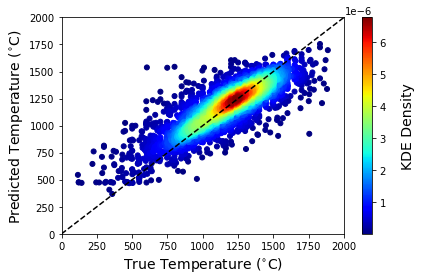

In [792]:
# sinter temp plot

fold = 1
operation = 1
y_pred = np.mean(y_pred_test[fold], axis=1)
y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])

fig, ax = plt.subplots()
x = np.array(y_true[:, operation])
y = np.array(y_pred[:, operation])
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax_ = ax.scatter(x, y, c=z, cmap=cm.jet, s=25)
cbar = plt.colorbar(ax_)
cbar.set_label("KDE Density", labelpad=15, fontsize=14)

plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.plot([0, 2000], [0, 2000], color='black', linestyle='dashed')
ax.set_xlabel("True Temperature ($^{\circ}$C)", fontsize=14)
ax.set_ylabel("Predicted Temperature ($^{\circ}$C)", fontsize=14)
fig.tight_layout()
fig.savefig('figures/cvae_sinter_temp_parity.png', dpi=150)

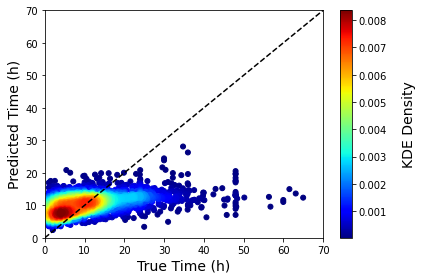

In [795]:
# calcine time plot

fold = 1
operation = 4
y_pred = np.mean(y_pred_test[fold], axis=1)
y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])

fig, ax = plt.subplots()
x = np.array(y_true[:, operation])
y = np.array(y_pred[:, operation])
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax_ = ax.scatter(x, y, c=z, cmap=cm.jet, s=25)
cbar = plt.colorbar(ax_)
cbar.set_label("KDE Density", labelpad=15, fontsize=14)

plt.xlim(0, 70)
plt.ylim(0, 70)
plt.plot([0, 70], [0, 70], color='black', linestyle='dashed')
ax.set_xlabel("True Time (h)", fontsize=14)
ax.set_ylabel("Predicted Time (h)", fontsize=14)
fig.tight_layout()
fig.savefig('figures/cvae_calcine_time_parity.png', dpi=150)

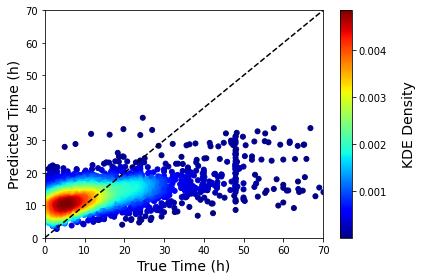

In [796]:
# sinter time plot

fold = 1
operation = 5
y_pred = np.mean(y_pred_test[fold], axis=1)
y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])

fig, ax = plt.subplots()
x = np.array(y_true[:, operation])
y = np.array(y_pred[:, operation])
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax_ = ax.scatter(x, y, c=z, cmap=cm.jet, s=25)
cbar = plt.colorbar(ax_)
cbar.set_label("KDE Density", labelpad=15, fontsize=14)

plt.xlim(0, 70)
plt.ylim(0, 70)
plt.plot([0, 70], [0, 70], color='black', linestyle='dashed')
ax.set_xlabel("True Time (h)", fontsize=14)
ax.set_ylabel("Predicted Time (h)", fontsize=14)
fig.tight_layout()
fig.savefig('figures/cvae_sinter_time_parity.png', dpi=150)

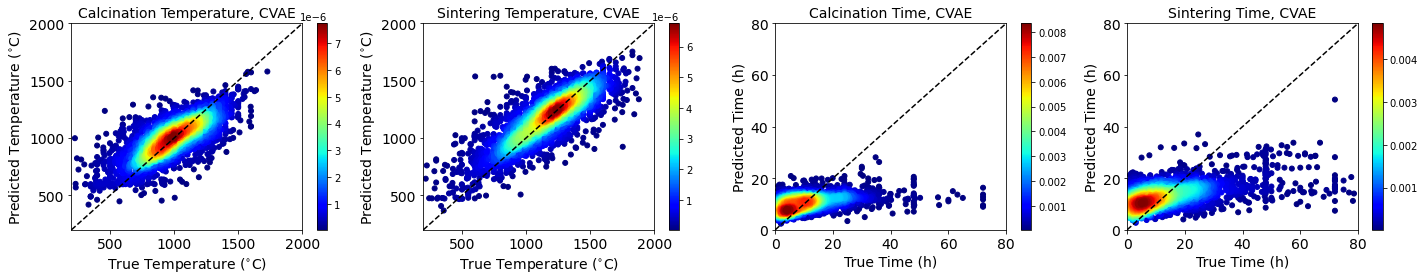

In [949]:
# joint plot
pretty_tasks = ["Calcination Temperature", "Sintering Temperature", "Calcination Time", "Sintering Time"]
model = "CVAE"
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fold = 1
for i, operation in enumerate([0, 1, 4, 5]):
    y_pred = np.mean(y_pred_test[fold], axis=1)
    y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])

    x = np.array(y_true[:, operation])
    y = np.array(y_pred[:, operation])
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax_ = ax[i].scatter(x, y, c=z, cmap=cm.jet, s=25)
    cbar = plt.colorbar(ax_, ax=ax[i])

    if i <= 1:
        ax[i].set_xlim(200, 2000)
        ax[i].set_ylim(200, 2000)
        ax[i].plot([200, 2000], [200, 2000], color='black', linestyle='dashed')
        ax[i].set_xlabel("True Temperature ($^{\circ}$C)", fontsize=14)
        ax[i].set_ylabel("Predicted Temperature ($^{\circ}$C)", fontsize=14)
        ax[i].set_yticks([500, 1000, 1500, 2000])
    else:
        ax[i].set_xlim(0, 80)
        ax[i].set_ylim(0, 80)
        ax[i].plot([0, 80], [0, 80], color='black', linestyle='dashed')
        ax[i].set_xlabel("True Time (h)", fontsize=14)
        ax[i].set_ylabel("Predicted Time (h)", fontsize=14)
    ax[i].tick_params(labelsize=14)
    ax[i].set_title(pretty_tasks[i] + ", " + model.upper(), fontsize=14)
fig.tight_layout()
fig.savefig('figures/cvae_parity_combined.png', dpi=150)

# Plot selected materials and their sintering/calcination temperatures

In [1639]:
# find low RMSE for sinter and calcine
fold = 1
y_pred = np.mean(y_pred_test[fold], axis=1)
y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])

calcine_temp_rmse = []
sinter_temp_rmse = []
calcine_time_rmse = []
sinter_time_rmse = []

total_error = []
for i in range(len(y_true)):
    calcine_temp_rmse.append(mean_squared_error(y_true[i][0:1], y_pred[i][0:1], squared=False))
    sinter_temp_rmse.append(mean_squared_error(y_true[i][1:2], y_pred[i][1:2], squared=False))
    calcine_time_rmse.append(mean_squared_error(y_true[i][4:5], y_pred[i][4:5], squared=False))
    sinter_time_rmse.append(mean_squared_error(y_true[i][5:6], y_pred[i][5:6], squared=False))
    
    total_error.append((calcine_temp_rmse[i] + sinter_temp_rmse[i])/2)
total_inds = np.argsort(total_error)

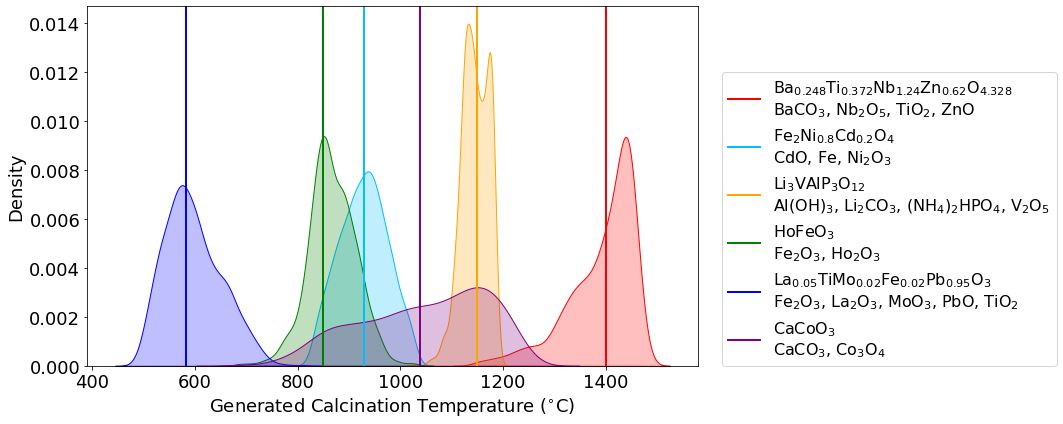

In [1736]:
target_names = list(X_test_df[fold]['targets'].values)
precursors = list(X_test_df[fold]['precursors'].values)

# good = [total_inds[19], total_inds[1], total_inds[3], total_inds[25], total_inds[85], total_inds[88], total_inds[98], total_inds[125]]
good = [total_inds[19], total_inds[72], total_inds[3], total_inds[25], total_inds[74], total_inds[85]]
colors = ["red", "deepskyblue", "orange", "green", "blue", "purple"]
labels = []
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

targets_to_plot = [target_names[idx] for idx in good]
precursors_to_plot = [precursors[idx] for idx in good]
targets_to_plot = clean_formulas(targets_to_plot)
precursors_to_plot = [clean_formulas(x) for x in precursors_to_plot]

for idx, color in zip(good, colors):
    sns.kdeplot(y_pred_test[fold][idx, :, 0], color=color, fill=True)
    plt.axvline(x=y_true[idx][0], color=color, linewidth=2)
for i in range(len(good)):
    label = targets_to_plot[i] + "\n" + ", ".join(precursors_to_plot[i])
    labels.append(label)
    
ax.set_xlabel("Generated Calcination Temperature ($^{\circ}$C)", fontsize=18)
ax.set_ylabel("Density", fontsize=18)
# ax.set_yticks([0, 0.005, 0.010, 0.015, 0.020, 0.025])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(labels, loc=(1.04,0), fontsize=16)
fig.tight_layout()
plt.show()
fig.savefig('figures/generated_calcination_plots.png', dpi=150)

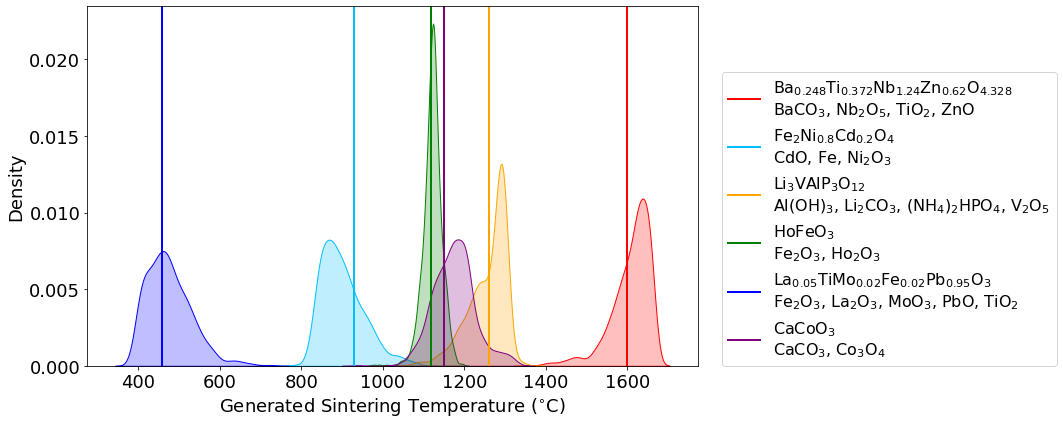

In [1737]:
colors = ["red", "deepskyblue", "orange", "green", "blue", "purple"]
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
for idx, color in zip(good, colors):
    sns.kdeplot(y_pred_test[fold][idx, :, 1], color=color, fill=True)
    plt.axvline(x=y_true[idx][1], color=color, linewidth=2)
    
ax.set_xlabel("Generated Sintering Temperature ($^{\circ}$C)", fontsize=18)
ax.set_ylabel("Density", fontsize=18)
# ax.set_yticks([0, 0.005, 0.010, 0.015, 0.020, 0.025])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(labels, loc=(1.04,0), fontsize=16)
fig.tight_layout()
plt.show()
fig.savefig('figures/generated_sintering_plots.png', dpi=150)

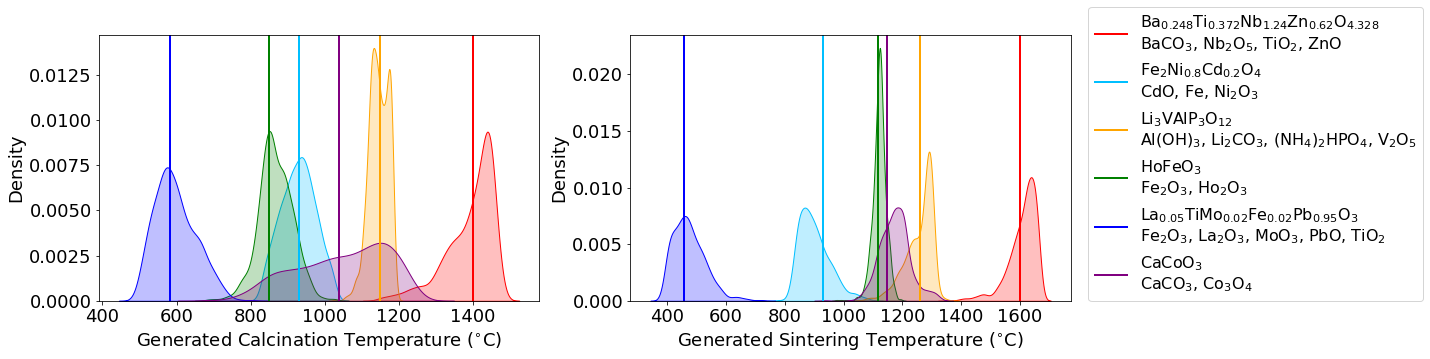

In [1755]:
target_names = list(X_test_df[fold]['targets'].values)
precursors = list(X_test_df[fold]['precursors'].values)

# good = [total_inds[19], total_inds[1], total_inds[3], total_inds[25], total_inds[85], total_inds[88], total_inds[98], total_inds[125]]
good = [total_inds[19], total_inds[72], total_inds[3], total_inds[25], total_inds[74], total_inds[85]]
colors = ["red", "deepskyblue", "orange", "green", "blue", "purple"]
labels = []
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

targets_to_plot = [target_names[idx] for idx in good]
precursors_to_plot = [precursors[idx] for idx in good]
targets_to_plot = clean_formulas(targets_to_plot)
precursors_to_plot = [clean_formulas(x) for x in precursors_to_plot]

for idx, color in zip(good, colors):
    sns.kdeplot(y_pred_test[fold][idx, :, 0], color=color, fill=True, ax=ax[0])
    ax[0].axvline(x=y_true[idx][0], color=color, linewidth=2)
    
    sns.kdeplot(y_pred_test[fold][idx, :, 1], color=color, fill=True, ax=ax[1])
    ax[1].axvline(x=y_true[idx][1], color=color, linewidth=2)
for i in range(len(good)):
    label = targets_to_plot[i] + "\n" + ", ".join(precursors_to_plot[i])
    labels.append(label)
    
ax[0].set_xlabel("Generated Calcination Temperature ($^{\circ}$C)", fontsize=18)
ax[0].set_ylabel("Density", fontsize=18)

ax[1].set_xlabel("Generated Sintering Temperature ($^{\circ}$C)", fontsize=18)
ax[1].set_ylabel("Density", fontsize=18)

ax[0].tick_params(axis='x', labelsize=18)
ax[1].tick_params(axis='x', labelsize=18)
ax[0].tick_params(axis='y', labelsize=18)
ax[1].tick_params(axis='y', labelsize=18)

ax[1].legend(labels, loc=(1.04,0), fontsize=16)
fig.tight_layout()
plt.show()
fig.savefig('figures/generated_calcination_sintering_plots.png', dpi=150)

# Check error as function of num. points

In [797]:
n_pts_test_k = []
for fold in range(len(y_test_k)):
    curr = []
    for entry in y_test_k[fold]:
        curr.append(len(entry['temp_time_vector']))
    n_pts_test_k.append(curr)

In [877]:
# temperature

all_maes_calcine = []
all_rmses_calcine = []
all_r2_calcine = []
all_fold_rmse_std_calcine = []
all_fold_r2_std_calcine = []

all_maes_sinter = []
all_rmses_sinter = []
all_r2_sinter = []
all_fold_rmse_std_sinter = []
all_fold_r2_std_sinter = []

all_maes_calcine_time = []
all_rmses_calcine_time = []
all_r2_calcine_time = []
all_fold_rmse_std_calcine_time = []
all_fold_r2_std_calcine_time = []

all_maes_sinter_time = []
all_rmses_sinter_time = []
all_r2_sinter_time = []
all_fold_rmse_std_sinter_time = []
all_fold_r2_std_sinter_time = []



min_num_pts = [1, 2, 3, 4, 5]
for operation in [0, 1, 4, 5]:
    lens = []

    for i in min_num_pts:
        curr = []
        curr_true = []
        all_fold_rmse = []
        all_fold_r2 = []
        for fold in range(len(n_pts_test_k)):
            y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])
            y_pred = np.mean(y_pred_test[fold], axis=1)

            curr_fold = []
            curr_fold_true = []
            for ind in range(len(n_pts_test_k[fold])):
                if n_pts_test_k[fold][ind] >= i:
                    curr.append(y_pred[ind][operation])
                    curr_true.append(y_true[ind][operation])
                    
                    curr_fold.append(y_pred[ind][operation])
                    curr_fold_true.append(y_true[ind][operation])
                    
            all_fold_rmse.append(mean_squared_error(curr_fold_true, curr_fold, squared=False))
            all_fold_r2.append(r2_score(curr_fold_true, curr_fold))
        if operation == 0:
            all_maes_calcine.append(mean_absolute_error(curr_true, curr))
            all_rmses_calcine.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_calcine.append(r2_score(curr_true, curr))
            lens.append(len(curr))
            
            all_fold_rmse_std_calcine.append(np.std(all_fold_rmse))
            all_fold_r2_std_calcine.append(np.std(all_fold_r2))
        elif operation == 1:
            all_maes_sinter.append(mean_absolute_error(curr_true, curr))
            all_rmses_sinter.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_sinter.append(r2_score(curr_true, curr))
            lens.append(len(curr))
            
            all_fold_rmse_std_sinter.append(np.std(all_fold_rmse))
            all_fold_r2_std_sinter.append(np.std(all_fold_r2))
        elif operation == 4:
            all_maes_calcine_time.append(mean_absolute_error(curr_true, curr))
            all_rmses_calcine_time.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_calcine_time.append(r2_score(curr_true, curr))
            lens.append(len(curr))
            
            all_fold_rmse_std_calcine_time.append(np.std(all_fold_rmse))
            all_fold_r2_std_calcine_time.append(np.std(all_fold_r2))
        elif operation == 5:
            all_maes_sinter_time.append(mean_absolute_error(curr_true, curr))
            all_rmses_sinter_time.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_sinter_time.append(r2_score(curr_true, curr))
            lens.append(len(curr))
            
            all_fold_rmse_std_sinter_time.append(np.std(all_fold_rmse))
            all_fold_r2_std_sinter_time.append(np.std(all_fold_r2))

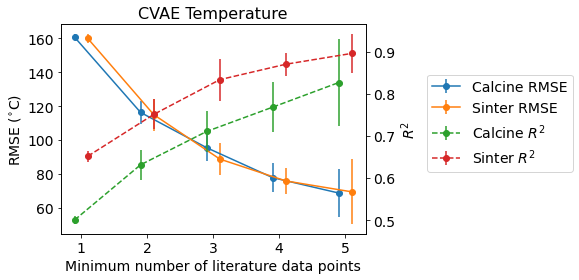

In [852]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData

trans3 = Affine2D().translate(-0.1, 0.0) + ax2.transData
trans4 = Affine2D().translate(+0.1, 0.0) + ax2.transData

ax.errorbar(min_num_pts, all_rmses_calcine, marker='o', label="Calcine RMSE", yerr=all_fold_rmse_std_calcine, transform=trans1)
ax2.errorbar(min_num_pts, all_r2_calcine, marker='o', color='tab:green', linestyle='dashed', label="Calcine $R^2$", yerr=all_fold_r2_std_calcine, transform=trans3)

ax2.errorbar(min_num_pts, all_r2_sinter, marker='o', color='tab:red', linestyle='dashed', label="Sinter $R^2$", yerr=all_fold_r2_std_sinter, transform=trans4)
ax.errorbar(min_num_pts, all_rmses_sinter, marker='o', color='tab:orange', label="Sinter RMSE", yerr=all_fold_rmse_std_sinter, transform=trans2)

ax.set_xlabel("Minimum number of literature data points", fontsize=14)
ax.set_ylabel("RMSE ($^{\circ}$C)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel("$R^2$", fontsize=14)
lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
ax.set_title("CVAE Temperature", fontsize=16)
fig.tight_layout()
plt.show()
# fig.savefig("figures/cvae_temperature_error_plot.png", dpi=150,  bbox_extra_artists=(lgd,), bbox_inches='tight')

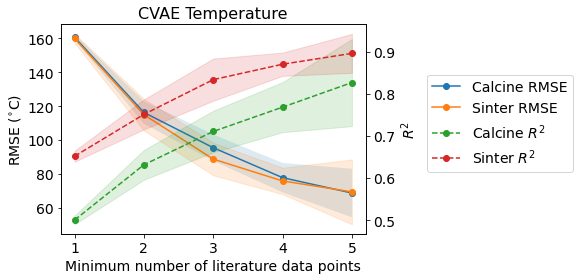

In [881]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

all_rmses_calcine=np.array(all_rmses_calcine)
all_fold_rmse_std_calcine=np.array(all_fold_rmse_std_calcine)
all_rmses_sinter=np.array(all_rmses_sinter)
all_fold_rmse_std_sinter=np.array(all_fold_rmse_std_sinter)

all_r2_calcine=np.array(all_r2_calcine)
all_fold_r2_std_calcine=np.array(all_fold_r2_std_calcine)
all_r2_sinter=np.array(all_r2_sinter)
all_fold_r2_std_sinter=np.array(all_fold_r2_std_sinter)


ax.plot(min_num_pts, all_rmses_calcine, marker='o', label="Calcine RMSE")
ax.fill_between(min_num_pts, all_rmses_calcine-all_fold_rmse_std_calcine, all_rmses_calcine+all_fold_rmse_std_calcine, alpha=0.15)
ax2.plot(min_num_pts, all_r2_calcine, marker='o', color='tab:green', linestyle='dashed', label="Calcine $R^2$")
ax2.fill_between(min_num_pts, all_r2_calcine-all_fold_r2_std_calcine, all_r2_calcine+all_fold_r2_std_calcine, color='tab:green', alpha=0.15)


ax2.plot(min_num_pts, all_r2_sinter, marker='o', color='tab:red', linestyle='dashed', label="Sinter $R^2$")
ax2.fill_between(min_num_pts, all_r2_sinter-all_fold_r2_std_sinter, all_r2_sinter+all_fold_r2_std_sinter, color='tab:red', alpha=0.15)
ax.plot(min_num_pts, all_rmses_sinter, marker='o', color='tab:orange', label="Sinter RMSE")
ax.fill_between(min_num_pts, all_rmses_sinter-all_fold_rmse_std_sinter, all_rmses_sinter+all_fold_rmse_std_sinter, color='tab:orange', alpha=0.15)

ax.set_xlabel("Minimum number of literature data points", fontsize=14)
ax.set_ylabel("RMSE ($^{\circ}$C)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel("$R^2$", fontsize=14)
lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
ax.set_title("CVAE Temperature", fontsize=16)
fig.tight_layout()
plt.show()
fig.savefig("figures/cvae_temperature_error_plot_combined.png", dpi=150,  bbox_extra_artists=(lgd,), bbox_inches='tight')

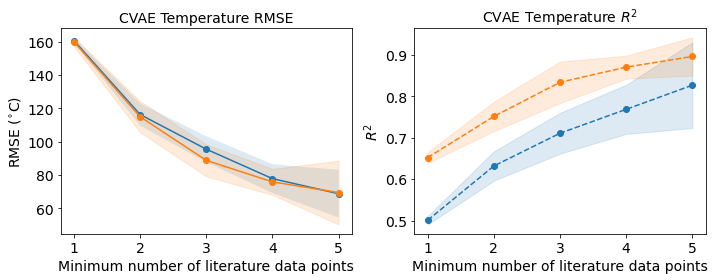

In [920]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(min_num_pts, all_rmses_calcine, marker='o', label="Calcine RMSE")
ax[0].fill_between(min_num_pts, all_rmses_calcine-all_fold_rmse_std_calcine, all_rmses_calcine+all_fold_rmse_std_calcine, alpha=0.15)
ax[1].plot(min_num_pts, all_r2_calcine, marker='o', color='tab:blue', linestyle='dashed', label="Calcine $R^2$")
ax[1].fill_between(min_num_pts, all_r2_calcine-all_fold_r2_std_calcine, all_r2_calcine+all_fold_r2_std_calcine, color='tab:blue', alpha=0.15)


ax[1].plot(min_num_pts, all_r2_sinter, marker='o', color='tab:orange', linestyle='dashed', label="Sinter $R^2$")
ax[1].fill_between(min_num_pts, all_r2_sinter-all_fold_r2_std_sinter, all_r2_sinter+all_fold_r2_std_sinter, color='tab:orange', alpha=0.15)
ax[0].plot(min_num_pts, all_rmses_sinter, marker='o', color='tab:orange', label="Sinter RMSE")
ax[0].fill_between(min_num_pts, all_rmses_sinter-all_fold_rmse_std_sinter, all_rmses_sinter+all_fold_rmse_std_sinter, color='tab:orange', alpha=0.15)

ax[0].set_xlabel("Minimum number of literature data points", fontsize=14)
ax[1].set_xlabel("Minimum number of literature data points", fontsize=14)

ax[0].set_ylabel("RMSE ($^{\circ}$C)", fontsize=14)
ax[1].set_ylabel("$R^2$", fontsize=14)

ax[0].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

# lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
# fig.suptitle("CVAE Temperature", fontsize=16)
ax[0].set_title("CVAE Temperature RMSE", fontsize=14)
ax[1].set_title("CVAE Temperature $R^2$", fontsize=14)
fig.tight_layout()
plt.show()
fig.savefig("figures/cvae_temperature_error_plot_separate.png", dpi=150)

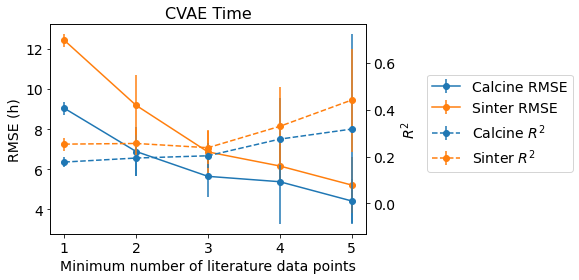

In [879]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.errorbar(min_num_pts, all_rmses_calcine_time, marker='o', label="Calcine RMSE", yerr=all_fold_rmse_std_calcine_time)
ax2.errorbar(min_num_pts, all_r2_calcine_time, marker='o', linestyle='dashed', label="Calcine $R^2$", yerr=all_fold_r2_std_calcine_time)

ax2.errorbar(min_num_pts, all_r2_sinter_time, marker='o', color='tab:orange', linestyle='dashed', label="Sinter $R^2$", yerr=all_fold_r2_std_sinter_time)
ax.errorbar(min_num_pts, all_rmses_sinter_time, marker='o', color='tab:orange', label="Sinter RMSE", yerr=all_fold_rmse_std_sinter_time)

ax.set_xlabel("Minimum number of literature data points", fontsize=14)
ax.set_ylabel("RMSE (h)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel("$R^2$", fontsize=14)
lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
ax.set_title("CVAE Time", fontsize=16)
fig.tight_layout()
plt.show()
# fig.savefig("figures/cvae_time_error_plot.png", dpi=150,  bbox_extra_artists=(lgd,), bbox_inches='tight')

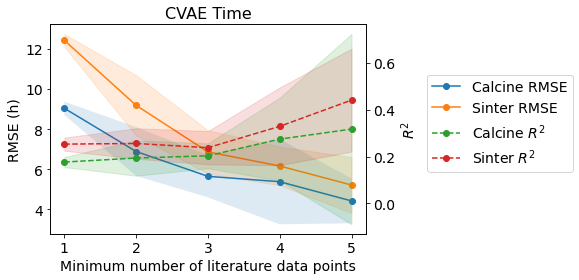

In [882]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

all_rmses_calcine_time=np.array(all_rmses_calcine_time)
all_fold_rmse_std_calcine_time=np.array(all_fold_rmse_std_calcine_time)
all_rmses_sinter_time=np.array(all_rmses_sinter_time)
all_fold_rmse_std_sinter_time=np.array(all_fold_rmse_std_sinter_time)

all_r2_calcine_time=np.array(all_r2_calcine_time)
all_fold_r2_std_calcine_time=np.array(all_fold_r2_std_calcine_time)
all_r2_sinter_time=np.array(all_r2_sinter_time)
all_fold_r2_std_sinter_time=np.array(all_fold_r2_std_sinter_time)


ax.plot(min_num_pts, all_rmses_calcine_time, marker='o', label="Calcine RMSE")
ax.fill_between(min_num_pts, all_rmses_calcine_time-all_fold_rmse_std_calcine_time, all_rmses_calcine_time+all_fold_rmse_std_calcine_time, alpha=0.15)
ax2.plot(min_num_pts, all_r2_calcine_time, marker='o', color='tab:green', linestyle='dashed', label="Calcine $R^2$")
ax2.fill_between(min_num_pts, all_r2_calcine_time-all_fold_r2_std_calcine_time, all_r2_calcine_time+all_fold_r2_std_calcine_time, color='tab:green', alpha=0.15)


ax2.plot(min_num_pts, all_r2_sinter_time, marker='o', color='tab:red', linestyle='dashed', label="Sinter $R^2$")
ax2.fill_between(min_num_pts, all_r2_sinter_time-all_fold_r2_std_sinter_time, all_r2_sinter_time+all_fold_r2_std_sinter_time, color='tab:red', alpha=0.15)
ax.plot(min_num_pts, all_rmses_sinter_time, marker='o', color='tab:orange', label="Sinter RMSE")
ax.fill_between(min_num_pts, all_rmses_sinter_time-all_fold_rmse_std_sinter_time, all_rmses_sinter_time+all_fold_rmse_std_sinter_time, color='tab:orange', alpha=0.15)

ax.set_xlabel("Minimum number of literature data points", fontsize=14)
ax.set_ylabel("RMSE (h)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel("$R^2$", fontsize=14)
lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
ax.set_title("CVAE Time", fontsize=16)
fig.tight_layout()
plt.show()
fig.savefig("figures/cvae_time_error_plot_combined.png", dpi=150,  bbox_extra_artists=(lgd,), bbox_inches='tight')

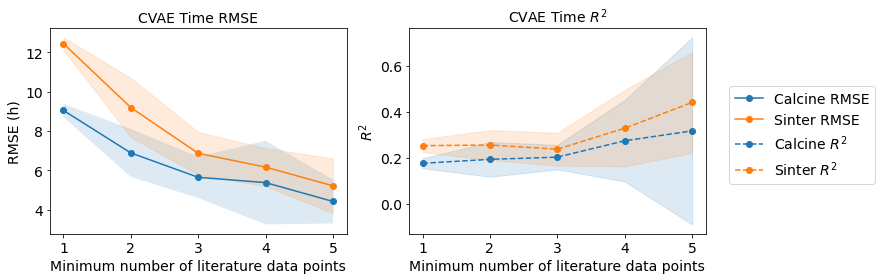

In [919]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(min_num_pts, all_rmses_calcine_time, marker='o', label="Calcine RMSE")
ax[0].fill_between(min_num_pts, all_rmses_calcine_time-all_fold_rmse_std_calcine_time, all_rmses_calcine_time+all_fold_rmse_std_calcine_time, alpha=0.15)
ax[1].plot(min_num_pts, all_r2_calcine_time, marker='o', color='tab:blue', linestyle='dashed', label="Calcine $R^2$")
ax[1].fill_between(min_num_pts, all_r2_calcine_time-all_fold_r2_std_calcine_time, all_r2_calcine_time+all_fold_r2_std_calcine_time, color='tab:blue', alpha=0.15)


ax[1].plot(min_num_pts, all_r2_sinter_time, marker='o', color='tab:orange', linestyle='dashed', label="Sinter $R^2$")
ax[1].fill_between(min_num_pts, all_r2_sinter_time-all_fold_r2_std_sinter_time, all_r2_sinter_time+all_fold_r2_std_sinter_time, color='tab:orange', alpha=0.15)
ax[0].plot(min_num_pts, all_rmses_sinter_time, marker='o', color='tab:orange', label="Sinter RMSE")
ax[0].fill_between(min_num_pts, all_rmses_sinter_time-all_fold_rmse_std_sinter_time, all_rmses_sinter_time+all_fold_rmse_std_sinter_time, color='tab:orange', alpha=0.15)

ax[0].set_xlabel("Minimum number of literature data points", fontsize=14)
ax[1].set_xlabel("Minimum number of literature data points", fontsize=14)

ax[0].set_ylabel("RMSE (h)", fontsize=14)
ax[1].set_ylabel("$R^2$", fontsize=14)

ax[0].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)

ax[0].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

lgd=fig.legend(bbox_to_anchor =(1.23, 0.71), fontsize=14)
ax[0].set_title("CVAE Time RMSE", fontsize=14)
ax[1].set_title("CVAE Time $R^2$", fontsize=14)
 #fig.suptitle("CVAE Time", fontsize=16)
fig.tight_layout()
plt.show()
fig.savefig("figures/cvae_time_error_plot_separate.png", dpi=150,  bbox_extra_artists=(lgd,), bbox_inches='tight')

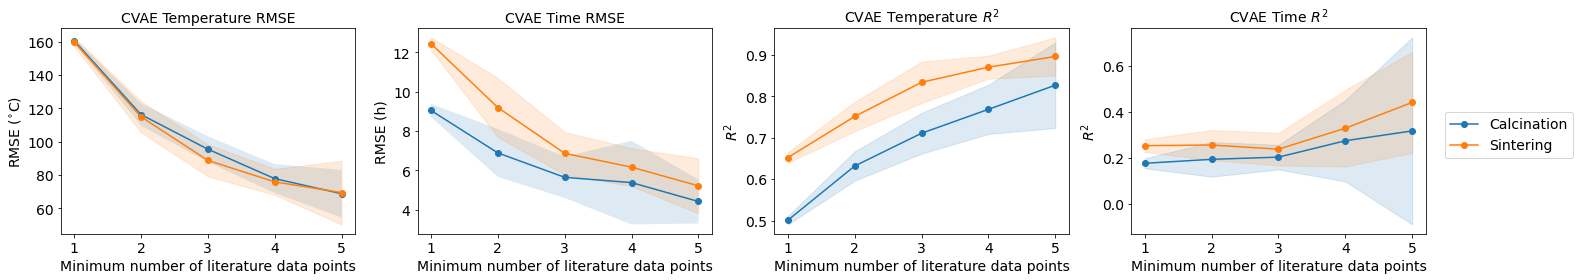

In [1756]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

ax[0].plot(min_num_pts, all_rmses_calcine, marker='o', label="Calcination")
ax[0].fill_between(min_num_pts, all_rmses_calcine-all_fold_rmse_std_calcine, all_rmses_calcine+all_fold_rmse_std_calcine, alpha=0.15)
ax[0].plot(min_num_pts, all_rmses_sinter, marker='o', color='tab:orange', label="Sintering")
ax[0].fill_between(min_num_pts, all_rmses_sinter-all_fold_rmse_std_sinter, all_rmses_sinter+all_fold_rmse_std_sinter, color='tab:orange', alpha=0.15)

ax[2].plot(min_num_pts, all_r2_calcine, marker='o', color='tab:blue', label="_nolegend_")
ax[2].fill_between(min_num_pts, all_r2_calcine-all_fold_r2_std_calcine, all_r2_calcine+all_fold_r2_std_calcine, color='tab:blue', alpha=0.15)
ax[2].plot(min_num_pts, all_r2_sinter, marker='o', color='tab:orange', label="_nolegend_")
ax[2].fill_between(min_num_pts, all_r2_sinter-all_fold_r2_std_sinter, all_r2_sinter+all_fold_r2_std_sinter, color='tab:orange', alpha=0.15)

ax[0].set_xlabel("Minimum number of literature data points", fontsize=14)
ax[2].set_xlabel("Minimum number of literature data points", fontsize=14)

ax[0].set_ylabel("RMSE ($^{\circ}$C)", fontsize=14)
ax[2].set_ylabel("$R^2$", fontsize=14)

ax[0].tick_params(axis='x', labelsize=14)
ax[2].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[2].tick_params(axis='y', labelsize=14)

# lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
# fig.suptitle("CVAE Temperature", fontsize=16)
ax[0].set_title("CVAE Temperature RMSE", fontsize=14)
ax[2].set_title("CVAE Temperature $R^2$", fontsize=14)


ax[1].plot(min_num_pts, all_rmses_calcine_time, marker='o', label="_nolegend_")
ax[1].fill_between(min_num_pts, all_rmses_calcine_time-all_fold_rmse_std_calcine_time, all_rmses_calcine_time+all_fold_rmse_std_calcine_time, alpha=0.15)
ax[1].plot(min_num_pts, all_rmses_sinter_time, marker='o', color='tab:orange', label="_nolegend_")
ax[1].fill_between(min_num_pts, all_rmses_sinter_time-all_fold_rmse_std_sinter_time, all_rmses_sinter_time+all_fold_rmse_std_sinter_time, color='tab:orange', alpha=0.15)

ax[3].plot(min_num_pts, all_r2_calcine_time, marker='o', color='tab:blue', label="_nolegend_")
ax[3].fill_between(min_num_pts, all_r2_calcine_time-all_fold_r2_std_calcine_time, all_r2_calcine_time+all_fold_r2_std_calcine_time, color='tab:blue', alpha=0.15)
ax[3].plot(min_num_pts, all_r2_sinter_time, marker='o', color='tab:orange', label="_nolegend_")
ax[3].fill_between(min_num_pts, all_r2_sinter_time-all_fold_r2_std_sinter_time, all_r2_sinter_time+all_fold_r2_std_sinter_time, color='tab:orange', alpha=0.15)

ax[1].set_xlabel("Minimum number of literature data points", fontsize=14)
ax[3].set_xlabel("Minimum number of literature data points", fontsize=14)

ax[1].set_ylabel("RMSE (h)", fontsize=14)
ax[3].set_ylabel("$R^2$", fontsize=14)

ax[1].tick_params(axis='x', labelsize=14)
ax[3].tick_params(axis='x', labelsize=14)

ax[1].tick_params(axis='y', labelsize=14)
ax[3].tick_params(axis='y', labelsize=14)

lgd=fig.legend(bbox_to_anchor =(1.1, 0.62), fontsize=14)
ax[1].set_title("CVAE Time RMSE", fontsize=14)
ax[3].set_title("CVAE Time $R^2$", fontsize=14)



fig.tight_layout()
plt.show()
fig.savefig("figures/cvae_error_plot_combined.png", dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [1872]:
print(all_rmses_calcine)
print(all_rmses_sinter)
print(all_r2_calcine)
print(all_r2_sinter)
print('----')
print(all_rmses_calcine_time)
print(all_rmses_sinter_time)
print(all_r2_calcine_time)
print(all_r2_sinter_time)

[160.72391801 116.36466347  95.58023041  77.92303752  68.86000656]
[159.99459877 115.03874346  88.86787703  75.97506186  69.54815471]
[0.50081325 0.63177267 0.71081107 0.768481   0.82679064]
[0.65204611 0.75137619 0.83373018 0.87029548 0.89603047]
----
[9.04645033 6.88529689 5.64380064 5.37506667 4.41507472]
[12.44449358  9.19222838  6.86463934  6.16175602  5.21012823]
[0.17652103 0.19374597 0.20333765 0.27457588 0.31747247]
[0.25319192 0.25604683 0.23790215 0.32923382 0.44144871]


# Sintering time-temperature relationship

In [1758]:
# find low RMSE for sinter temp and time
fold = 9
y_pred = np.mean(y_pred_test[fold], axis=1)
y_true = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])

calcine_temp_rmse = []
sinter_temp_rmse = []
calcine_time_rmse = []
sinter_time_rmse = []

total_error = []
for i in range(len(y_true)):
    calcine_temp_rmse.append(mean_squared_error(y_true[i][0:1], y_pred[i][0:1], squared=False))
    sinter_temp_rmse.append(mean_squared_error(y_true[i][1:2], y_pred[i][1:2], squared=False))
    calcine_time_rmse.append(mean_squared_error(y_true[i][4:5], y_pred[i][4:5], squared=False))
    sinter_time_rmse.append(mean_squared_error(y_true[i][5:6], y_pred[i][5:6], squared=False))
    
    total_error.append((sinter_temp_rmse[i] + sinter_time_rmse[i])/2)
total_inds = np.argsort(total_error)

In [1759]:
def clean_formulas(formula_list):
    chem_list = [re.sub("([0-9]+(\.[0-9]+)?)", "_{\\1}", k) for k in formula_list]
    chem_list = ['$\mathregular{'+list_k+'}$' for list_k in chem_list]
    return chem_list
    

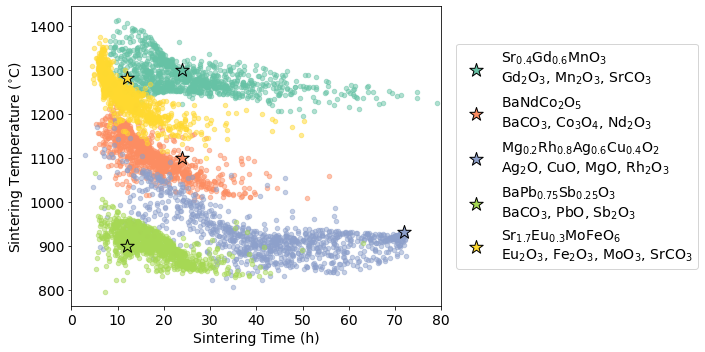

In [1760]:
fig, ax = plt.subplots(figsize=(10, 5))
# sintering_inds = [2056, 2074, 2, 2077] 2056, 2097, 57, 423, 554, 930, total_inds[89], total_inds[218], total_inds[398], total_inds[440], total_inds[443], total_inds[569]
# sintering_inds = total_inds[569:570]
# sintering_inds = [total_inds[218], 2056, total_inds[443], 554, total_inds[89], total_inds[569]]
sintering_inds = [total_inds[218], 2056, total_inds[443], 554, total_inds[569]]


targets_to_plot = [test_results[idx]['Target'] for idx in sintering_inds]
precursors_to_plot = [test_results[idx]['Precursors'] for idx in sintering_inds]
targets_to_plot = clean_formulas(targets_to_plot)
precursors_to_plot = [clean_formulas(x) for x in precursors_to_plot]


c = plt.get_cmap("Set2", 7)
for color_ind, j in enumerate(sintering_inds):
    ax.scatter(y_pred_test[9][j, :, 5], y_pred_test[9][j, :, 1], alpha=0.5, s=20, color=c(color_ind))
    gt = np.mean(test_results[j]['temp_time_vector'], axis=0)
for color_ind, j in enumerate(sintering_inds):
    gt = np.mean(test_results[j]['temp_time_vector'], axis=0)
    label = targets_to_plot[color_ind] + "\n" + ", ".join(precursors_to_plot[color_ind])
    ax.scatter(gt[5], gt[1], marker="*", edgecolor='black', linewidth=1, facecolor=c(color_ind), s=200, label=label)
ax.set_xlabel("Sintering Time (h)", fontsize=14)
ax.set_ylabel("Sintering Temperature ($^{\circ}$C)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(0, 80)
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, fontsize=14)
fig.tight_layout()
plt.show()
fig.savefig('figures/sinter_time_temp_relationship.png', dpi=150)

In [1562]:
def get_unique_test_set(df):
    test_results = []
    unique_inds = []
    for i, (target, precs, temps) in enumerate(zip(df['targets'], df['precursors'], df['temp_time_vector'])):
        found = False
        for result in test_results:
            if result["Target"] == target and set(result["Precursors"]) == set(precs):
                result["temp_time_vector"].append(temps)
                found = True
        if not found:
            new_result = {}
            new_result["Target"] = target
            new_result["Precursors"] = precs
            new_result["temp_time_vector"] = [temps]
            test_results.append(new_result)
            unique_inds.append(i)
    return test_results, np.array(unique_inds)

In [1574]:
test_results, unique_inds = get_unique_test_set(X_test_df[9])

In [1575]:
len(test_results)

2796

In [1576]:
for idx in sintering_inds:
    print(test_results[idx])

{'Target': 'Mo3Sb7', 'Precursors': ['Mo', 'Sb'], 'temp_time_vector': [array([ 905.87700741, 1116.46539144,  750.        ,  530.68314144,
         16.71850665,   29.57603154,   45.89131986,   19.73852085])]}
{'Target': 'LiMn0.4CoNi0.8O2', 'Precursors': ['Co(OH)2', 'Li2CO3', 'MnCO3', 'Ni(OH)2'], 'temp_time_vector': [array([ 900.        ,  879.22712069, 1311.26895048,    5.        ,
         10.        ,   20.59142744,   19.45947181,   17.1322462 ])]}
{'Target': 'CoCu11Sb4S13', 'Precursors': ['Co', 'Cu', 'S', 'Sb'], 'temp_time_vector': [array([598.18903908, 500.        , 487.37153856,  21.06789822,
        31.76825948,  30.        ,  22.4957682 ,  18.50989327])]}
{'Target': 'LaNiO3', 'Precursors': ['La2O3', 'Ni2O3'], 'temp_time_vector': [array([ 687.5621379 , 1123.51663425,  700.        ,  383.70647753,
          5.97858279,    9.98324492,    9.10158076,    8.03067333]), array([1100.        , 1300.        ,  790.31382198,  258.3705644 ,
          4.        ,    6.        ,   22.78780741, 

In [1766]:
total = 0
for fold in y_test_k:
    total += len(fold)
print(total)

27930


In [1767]:
y_test_k[0][0]

{'Target': 'Sr1.85La0.15TiMoO6',
 'Precursors': ['La2O3', 'MoO3', 'SrCO3', 'TiO2'],
 'temp_time_vector': [array([1250.        , 1400.        ,  911.00689393,  357.04445394,
           10.        ,   35.40079716,   51.43666363,   10.33499251])]}

In [1772]:
all_n_pts = []
for fold in n_pts_test_k:
    all_n_pts.extend(fold)

In [1811]:
values, base = np.histogram(all_n_pts, bins=bins)
#evaluate the cumulative
cumulative = np.cumsum(values) / np.sum(values)

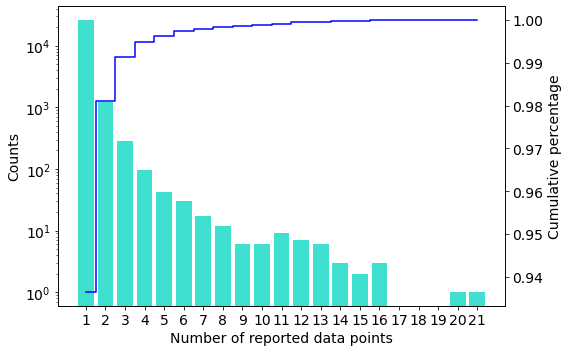

In [1869]:
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = ax.twinx()
ax.bar(base[:-1], values, log=True, color='turquoise')
# ax.hist(all_n_pts, log=True, color='turquoise', bins=bins)
ax2.step(base[:-1], cumulative, c='blue', where='mid')
ax.set_xticks(base[:-1])
ax.set_ylabel("Counts", fontsize=14)
ax2.set_ylabel("Cumulative percentage", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel("Number of reported data points", fontsize=14)
fig.tight_layout()
fig.show()
fig.savefig('figures/data_point_distribution.png', dpi=150)

In [1867]:
cumulative

array([0.93644826, 0.98098818, 0.99126387, 0.99477265, 0.99631221,
       0.99738632, 0.99799499, 0.99842463, 0.99863946, 0.99885428,
       0.99917651, 0.99942714, 0.99964196, 0.99974937, 0.99982098,
       0.99992839, 0.99992839, 0.99992839, 0.99992839, 0.9999642 ,
       1.        ])